In [2]:
from __future__ import division
import numpy as np
import scipy as sp
import math
import pandas as pd
import ipympl
import matplotlib.pyplot as plt
from clustering import cluster_lab
from generate_data import gen_data
from pred_analysis import *
import init_dict
import scipy.stats as st
from cycler import cycler

In [3]:
df1 = pd.read_csv('conv_clustered.csv')
df2 = pd.read_csv('conv_random.csv')
df1.head()


,ind,m,n,k,p,L,G,r,lda,u,...,maxsupp,avgsupp,maxc1,maxc2,cs_fit,avgk_0,avgk_1,avgk_2,iter,fit
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,0.0,0.920428
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,1.0,0.951383
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,2.0,0.972637
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,3.0,0.978787
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,4.0,0.983809


In [4]:
df2.head()

,ind,m,n,k,p,L,G,r,lda,u,...,maxsupp,avgsupp,maxc1,maxc2,cs_fit,avgk_0,avgk_1,avgk_2,iter,fit
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,0.0,-28848.026309
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,1.0,-0.249457
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,2.0,0.589800
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,3.0,0.718779
0,0,200,200,1,40,100,1000,0.2,5,0.2,...,0.6,0.57,0.988369,0.964042,1.0,0.440741,0.4,0.691815,4.0,0.801383


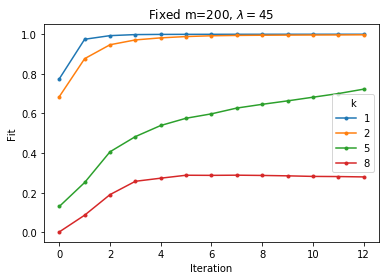

In [7]:
%matplotlib inline
s1 = df1[df1.lda==45]
plt.figure()
groups = s1.groupby('k')
for name, group in groups:
    plt.plot(group.iter, group.fit, marker='.', label=name)
plt.legend(title='k')
plt.xlabel('Iteration')
plt.ylabel('Fit')
plt.title('Fixed m=200, $\lambda = 45$')


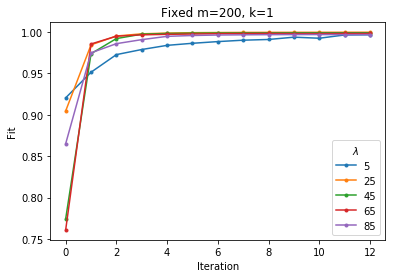

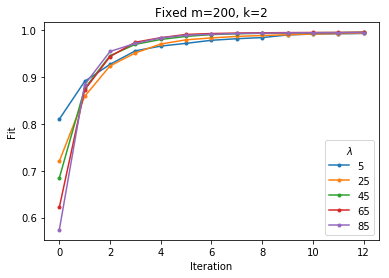

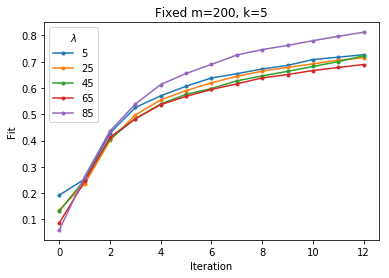

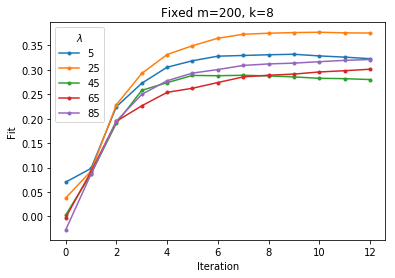

In [8]:
s1 = df1[df1.k==1]
plt.figure()
groups = s1.groupby('lda')
for name, group in groups:
    plt.plot(group.iter, group.fit, marker='.', label=name)
plt.legend(title='$\lambda$')
plt.xlabel('Iteration')
plt.ylabel('Fit')
plt.title('Fixed m=200, k=1')

s1 = df1[df1.k==2]
plt.figure()
groups = s1.groupby('lda')
for name, group in groups:
    plt.plot(group.iter, group.fit, marker='.', label=name)
plt.legend(title='$\lambda$')
plt.xlabel('Iteration')
plt.ylabel('Fit')
plt.title('Fixed m=200, k=2')

s1 = df1[df1.k==5]
plt.figure()
groups = s1.groupby('lda')
for name, group in groups:
    plt.plot(group.iter, group.fit, marker='.', label=name)
plt.legend(title='$\lambda$')
plt.xlabel('Iteration')
plt.ylabel('Fit')
plt.title('Fixed m=200, k=5')

s1 = df1[df1.k==8]
plt.figure()
groups = s1.groupby('lda')
for name, group in groups:
    plt.plot(group.iter, group.fit, marker='.', label=name)
plt.legend(title='$\lambda$')
plt.xlabel('Iteration')
plt.ylabel('Fit')
plt.title('Fixed m=200, k=8')


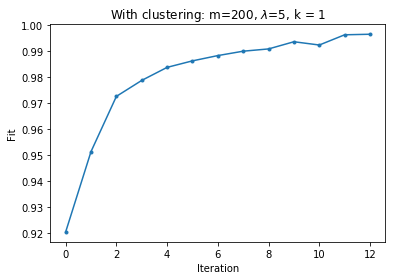

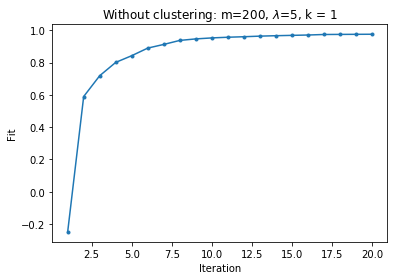

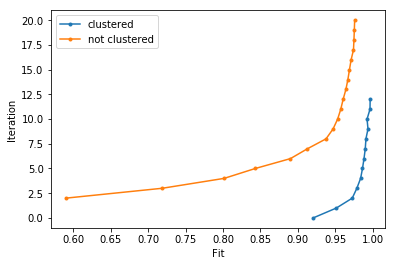

In [9]:
plt.figure()
plt.plot(df1.loc[0].iter, df1.loc[0].fit, marker = '.')
plt.xlabel('Iteration')
plt.ylabel('Fit')
plt.title('With clustering: m=200, $\lambda$=5, k = 1')
plt.show()
plt.figure()
plt.plot(df2[df2.iter>0].loc[0].iter, df2[df2.iter>0].loc[0].fit, marker = '.')
plt.xlabel('Iteration')
plt.ylabel('Fit')
plt.title('Without clustering: m=200, $\lambda$=5, k = 1')
plt.show()
plt.figure()
plt.plot(df1.loc[0].fit,df1.loc[0].iter,  marker = '.', label='clustered')
plt.plot(df2[df2.iter>1].loc[0].fit,df2[df2.iter>1].loc[0].iter,  marker = '.', label='not clustered')
plt.xlabel('Fit')
plt.ylabel('Iteration')
plt.legend()
plt.show()

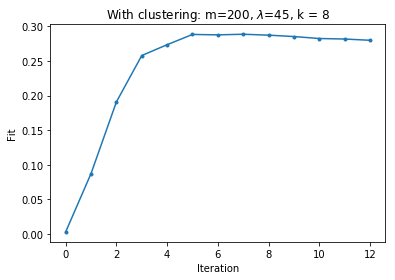

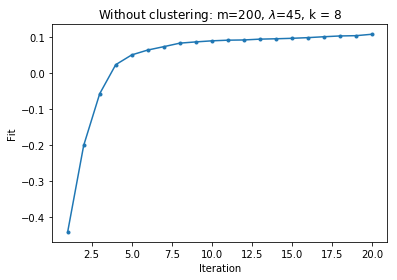

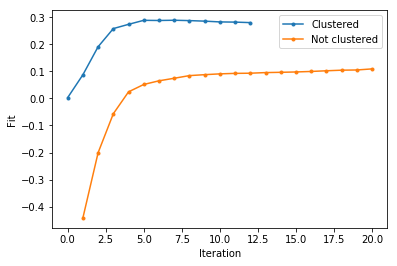

In [10]:
s1 = df1[(df1.k==8)&(df1.lda==45)]
s2 = df2[(df2.k==8)&(df2.lda==45)]
plt.figure()
plt.plot(s1.iter, s1.fit, marker = '.')
plt.xlabel('Iteration')
plt.ylabel('Fit')
plt.title('With clustering: m=200, $\lambda$=45, k = 8')

plt.figure()
plt.plot(s2[s2.iter>0].iter, s2[s2.iter>0].fit, marker = '.')
plt.xlabel('Iteration')
plt.ylabel('Fit')
plt.title('Without clustering: m=200, $\lambda$=45, k = 8')


plt.figure()
plt.plot( s1.iter, s1.fit,marker='.', label='Clustered')
plt.plot( s2[s2.iter>0].iter, s2[s2.iter>0].fit,marker='.', label = 'Not clustered')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fit')


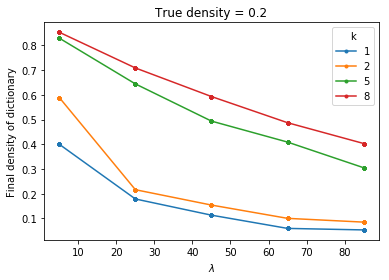

In [11]:
groups = df1.groupby('k')
for name, group in groups:
    plt.plot(group.lda, group.avgk_1, label = name, marker='.')
plt.legend(title='k')
plt.xlabel('$\lambda$')
plt.ylabel('Final density of dictionary')
plt.title('True density = 0.2')

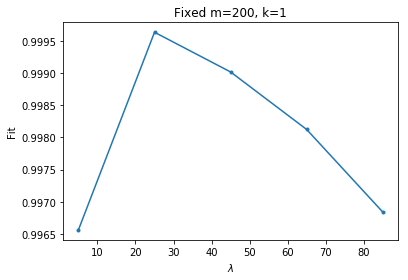

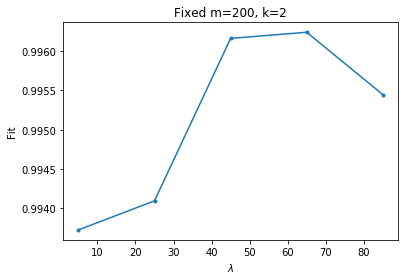

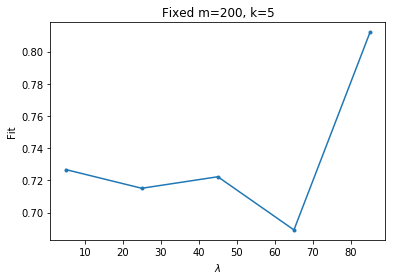

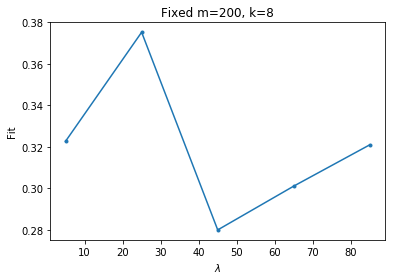

In [25]:
s = df1[df1.iter==12]
plt.plot(s[s.k==1].lda, s[s.k==1].fit, marker='.')
plt.xlabel('$\lambda$')
plt.ylabel('Fit')
plt.title('Fixed m=200, k=1')

plt.figure()
plt.plot(s[s.k==2].lda, s[s.k==2].fit, marker ='.')
plt.xlabel('$\lambda$')
plt.ylabel('Fit')
plt.title('Fixed m=200, k=2')

plt.figure()
plt.plot(s[s.k==5].lda, s[s.k==5].fit, marker='.')
plt.xlabel('$\lambda$')
plt.ylabel('Fit')
plt.title('Fixed m=200, k=5')

plt.figure()
plt.plot(s[s.k==8].lda, s[s.k==8].fit, marker='.')
plt.xlabel('$\lambda$')
plt.ylabel('Fit')
plt.title('Fixed m=200, k=8')